In [42]:
!pip install mplfinance


In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

#Loading of data

In [44]:
df_eth = pd.read_csv("ETH-USD.csv",parse_dates=True)


In [45]:
df_eth = df_eth.drop(columns=['Adj Close'])


In [46]:
df_xrp = pd.read_csv("xrp.csv",parse_dates=True)


In [47]:
df_eth.isnull().sum()


Date      0
Open      4
High      4
Low       4
Close     4
Volume    4
dtype: int64

In [48]:
df_eth.shape

(2212, 6)

In [49]:
df_eth[-1:] #26 agosto 2021 eth

,Date,Open,High,Low,Close,Volume
2211,2021-08-26,3229.452148,3247.775391,3062.338867,3101.602051,1.783986e+10


In [50]:
df_xrp.shape

(2536, 7)

In [51]:
df_xrp[-1:] #31 dicembre 2021 xrp

,Date,Open,High,Low,Close,Volume,Currency
2535,2021-12-31,0.83871,0.8535,0.80292,0.82995,457621696,USD


In [52]:
df_xrp.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2015-01-22,0.01523,0.01750,0.01523,0.01602,0,USD
1,2015-01-23,0.01602,0.01700,0.01600,0.01600,0,USD
2,2015-01-24,0.01600,0.01739,0.01500,0.01739,0,USD
3,2015-01-25,0.01739,0.01739,0.01560,0.01700,0,USD
4,2015-01-26,0.01700,0.01750,0.01469,0.01469,0,USD


In [53]:
df_xrp=df_xrp.drop('Currency', axis=1)

In [54]:
df_eth.dropna(inplace=True)
df_xrp.dropna(inplace=True)

#Data exploration - Ethereum trend

In [55]:
df_eth.describe()


,Open,High,Low,Close,Volume
count,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03
mean,433.578981,450.619491,414.840862,434.914512,7.348590e+09
std,683.498443,713.295560,650.311554,685.738356,1.075435e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,14.167250,14.561175,13.567750,14.260150,4.256840e+07
50%,203.964431,210.450729,196.916908,203.912002,2.290465e+09
75%,408.495575,418.961944,394.578835,409.866516,1.029495e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,8.448291e+10


In [56]:
df_xrp.describe()

,Open,High,Low,Close,Volume
count,2536.000000,2536.000000,2536.000000,2536.000000,2.536000e+03
mean,0.330514,0.347358,0.312567,0.330880,7.090076e+08
std,0.378275,0.403794,0.350965,0.378633,1.104928e+09
min,0.003560,0.003560,0.003000,0.003560,0.000000e+00
25%,0.008340,0.008845,0.008010,0.008400,5.123400e+05
50%,0.245050,0.253230,0.236995,0.245295,1.956968e+08
75%,0.447418,0.465310,0.427800,0.448005,1.073777e+09
max,2.780000,3.290000,2.580000,2.780000,1.383455e+10


In [57]:
df_eth['100ma'] = df_eth['Close'].rolling(window = 100, min_periods = 0).mean()
df_eth

,Date,Open,High,Low,Close,Volume,100ma
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762723
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233947
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730
...,...,...,...,...,...,...,...
2207,2021-08-22,3226.227295,3272.733154,3142.007080,3242.115479,1.598328e+10,2497.191824
2208,2021-08-23,3241.357422,3373.384277,3235.851318,3319.257324,2.051111e+10,2494.003176
2209,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,2.013103e+10,2489.852678
2210,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,1.890273e+10,2489.277854


In [58]:
df_xrp['100ma'] = df_xrp['Close'].rolling(window = 100, min_periods = 0).mean()
df_xrp

,Date,Open,High,Low,Close,Volume,100ma
0,2015-01-22,0.01523,0.01750,0.01523,0.01602,0,0.016020
1,2015-01-23,0.01602,0.01700,0.01600,0.01600,0,0.016010
2,2015-01-24,0.01600,0.01739,0.01500,0.01739,0,0.016470
3,2015-01-25,0.01739,0.01739,0.01560,0.01700,0,0.016602
4,2015-01-26,0.01700,0.01750,0.01469,0.01469,0,0.016220
...,...,...,...,...,...,...,...
2531,2021-12-27,0.91969,0.95497,0.91523,0.92622,442479648,1.020527
2532,2021-12-28,0.92664,0.92677,0.84575,0.85112,604163456,1.018558
2533,2021-12-29,0.85164,0.86439,0.81180,0.81650,574424896,1.017513
2534,2021-12-30,0.81681,0.85856,0.80420,0.83868,502922816,1.017167


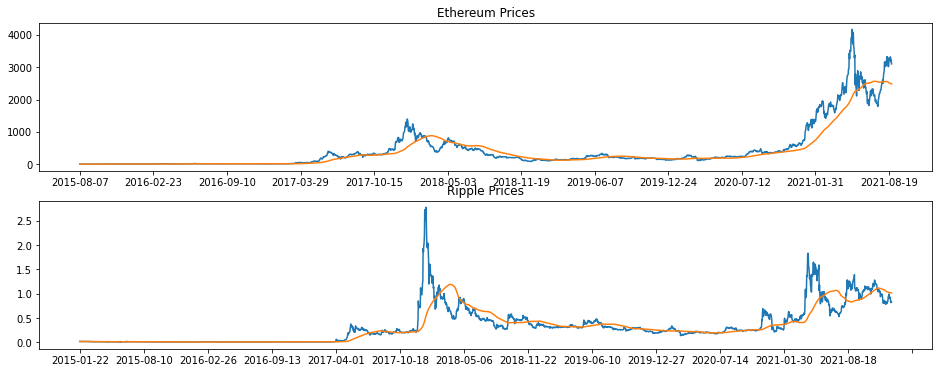

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(16,6))
ax[0].plot(df_eth.Date, df_eth.Close)
ax[0].plot(df_eth.Date, df_eth['100ma'])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[0].set_title('Ethereum Prices')
ax[1].plot(df_xrp.Date, df_xrp.Close)
ax[1].plot(df_xrp.Date, df_xrp['100ma'])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
ax[1].set_title('Ripple Prices')
#plt.grid()
plt.show()

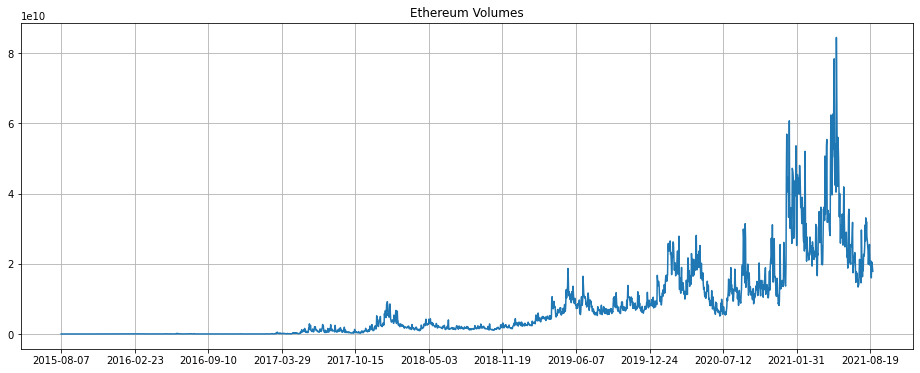

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_eth.Date, df_eth.Volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Volumes')
plt.grid()
plt.show()

We calculate the total value of its outstanding shares on the market, i.e. the market capitalisation.  Market capitalisation is an easy way for investors both to determine the size of a company and to try to assess the risk of investing in its shares.

In [11]:
df_eth['Total Traded'] = df_eth['Open']*df_eth['Volume']


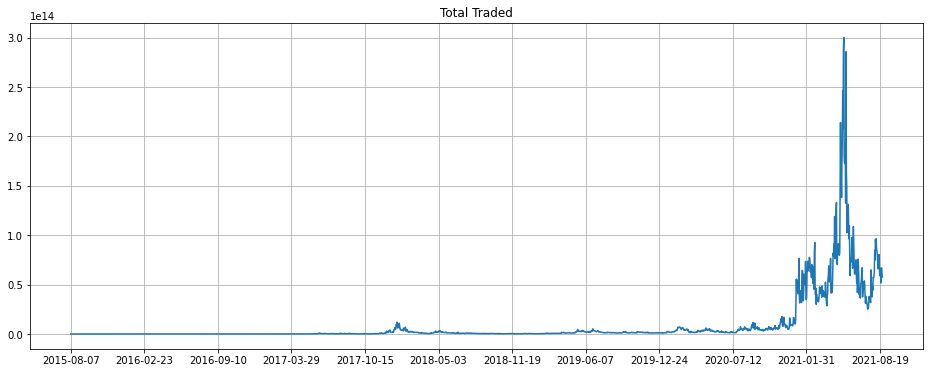

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_eth.Date, df_eth['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

We note that the highest peaks relate to the year 2021. Infact I found out in a article that around 13th Ethereum spiked (https://www.livemint.com/market/cryptocurrency/bitcoin-logs-over-800-jump-for-fy21-ethereum-zooms-1300-11617209720781.html)

"*Since October 2019, ethereum has been slowly but gradually stealing the market share from bitcoin. 
In a little more than 1.5 years, ethereum's dominance has gone from roughly 8% to 11.25%. The bulk of this market share can perhaps be attributed to the growth of various decentralized apps and crypto innovations on the ethereum blockchain, such as DeFi and NFTs*"


In [13]:
df_eth.iloc[df_eth['Total Traded'].argmax()]


Date                     2021-05-13
Open                    3828.918457
High                    4032.563477
Low                     3549.407227
Close                   3715.148438
Volume                78398214539.0
100ma                   2140.178688
Total Traded    300180370644222.875
Name: 2106, dtype: object

I create a candlestick plot for Ethereum prices from April 2021 to July 2021

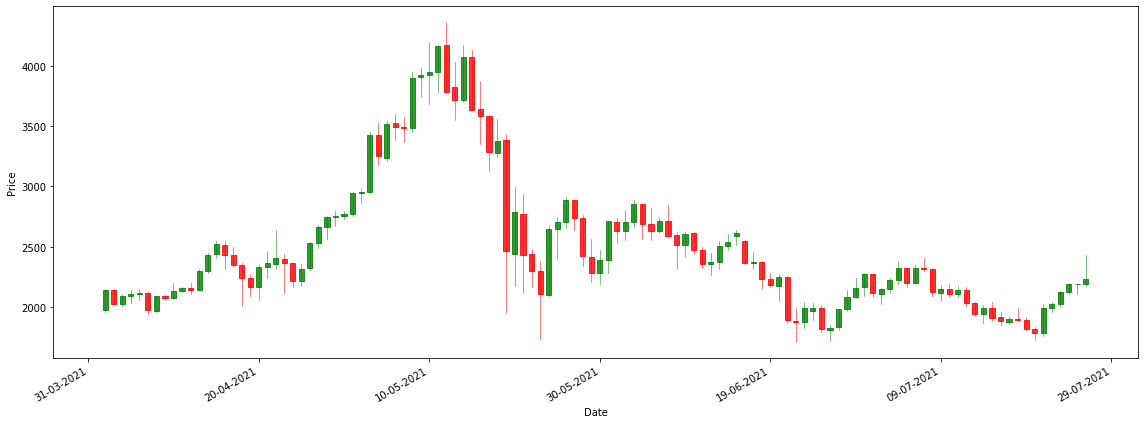

In [14]:
ohlc = df_eth[(df_eth['Date'] > '2021-04-01') & (df_eth['Date'] <= '2021-07-26')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
fig, ax = plt.subplots(figsize = (16,6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()


Percentage change is a way to calculate the degree of change in a stock over a specific period of time using simple arithmetic. This metric is useful to investors, who use it to compare stocks with different price movements. 

\begin{align}
   r_{t}= \frac{p_{t}} {p_{t-1}} -1
  \end{align}

In the formula, ${p_{t}}$ denotes the price of an asset time $t$. Thus, $r_{t}$ is the profit rate of holding the asset from time $t-1$ to $t$.
From here we can define $r_{t}+1$ as the *one period gross return*, which is the ratio of the new market value at the end of the holding period over the initial market value. 

In [15]:
df_eth["Returns"] = (df_eth["Close"]/df_eth["Close"].shift(1)) - 1


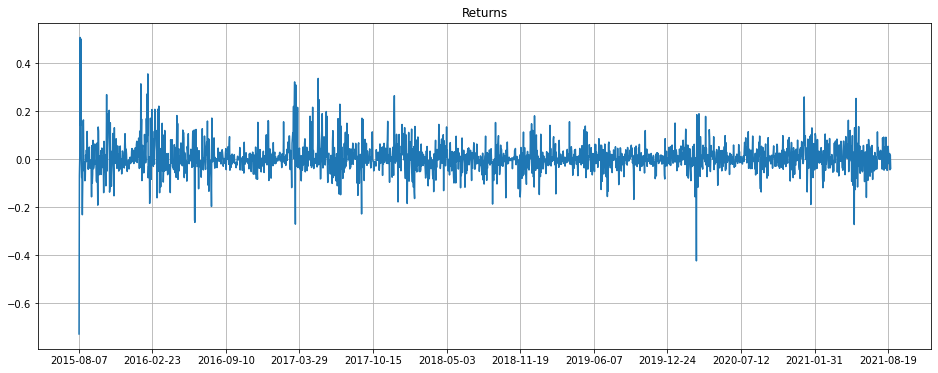

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_eth.Date, df_eth['Returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Returns')
plt.grid()
plt.show()


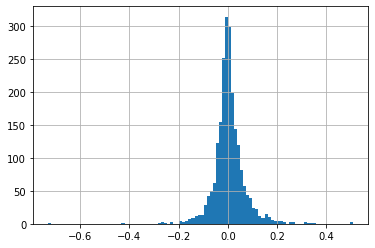

In [17]:
df_eth["Returns"].hist(bins=100);


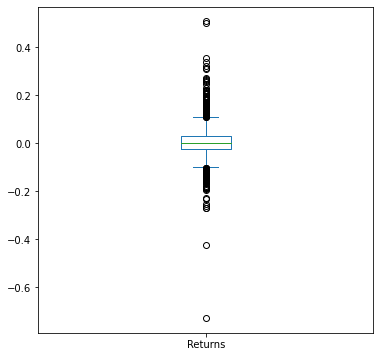

In [18]:
df_eth["Returns"].plot(kind = "box", figsize = (6,6));


The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one (https://www.investopedia.com/terms/c/cumulativereturn.asp#:~:text=The%20cumulative%20return%20is%20the,investment%20impacts%20its%20cumulative%20return).

\begin{align}
  c_{t}=(1+r_{t})c_{t-1}
      \end{align}

In [19]:
df_eth["Cumulative Return"] = (1 + df_eth["Returns"]).cumprod()


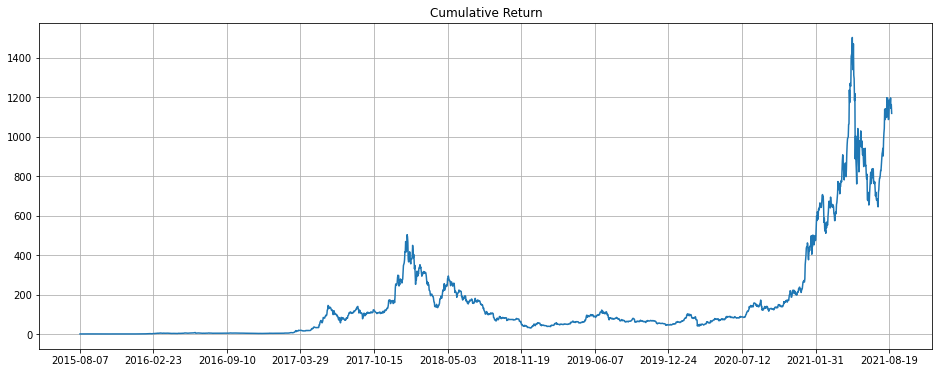

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_eth.Date, df_eth['Cumulative Return'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [21]:
df_eth.iloc[df_eth['Cumulative Return'].argmax()]


Date                            2021-05-11
Open                           3948.271973
High                           4178.208984
Low                            3783.889404
Close                          4168.701172
Volume                       52679737865.0
100ma                           2094.01106
Total Traded         207993932557366.34375
Returns                           0.054755
Cumulative Return              1503.795352
Name: 2104, dtype: object

In [22]:
df_eth["Date"] = pd.to_datetime(df_eth["Date"])
df_eth["Year"] = df_eth["Date"].dt.year
df_eth["Month"] = df_eth["Date"].dt.month
df_eth["Day"] = df_eth["Date"].dt.day

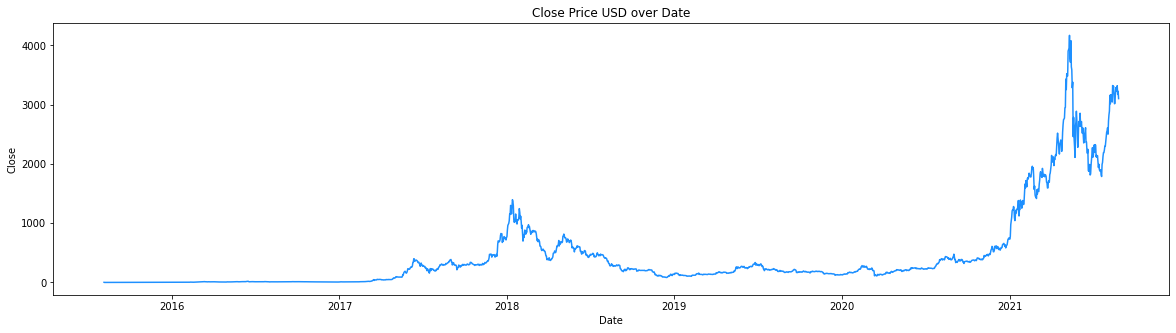

In [23]:
tmp_df_eth = df_eth.groupby(["Date"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Date", y="Close", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

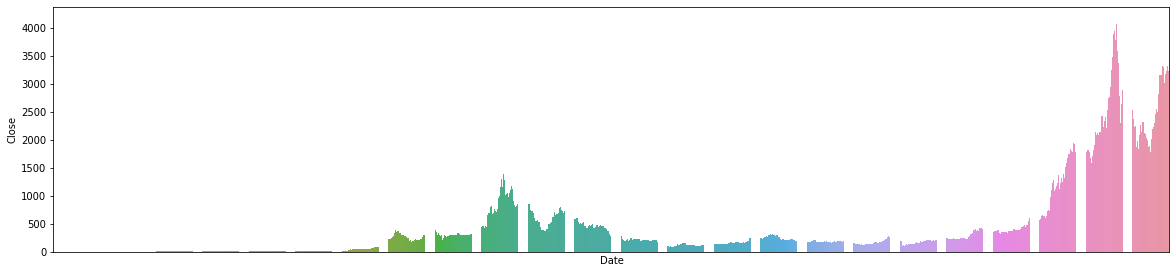

In [33]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,5))
sns.barplot(x=tmp_df_eth['Date'], y=tmp_df_eth['Close'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() 
plt.show();

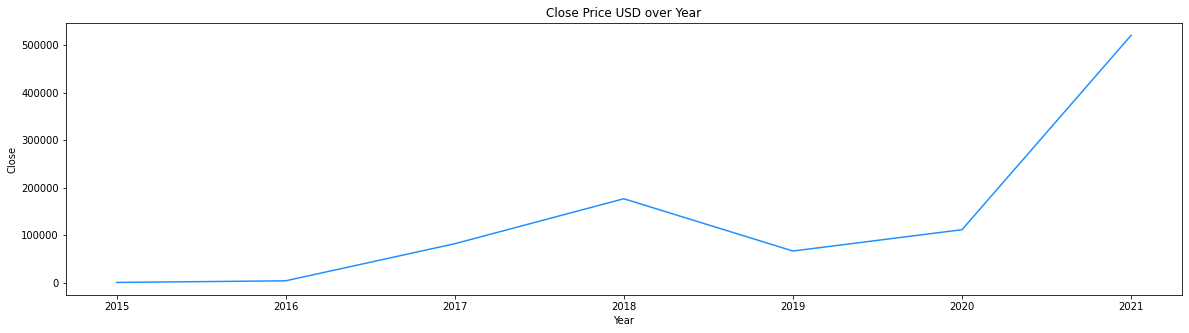

In [25]:
tmp_df_eth = df_eth.groupby(["Year"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Year", y="Close", color="dodgerblue")
plt.title('Close Price USD over Year')
plt.show()

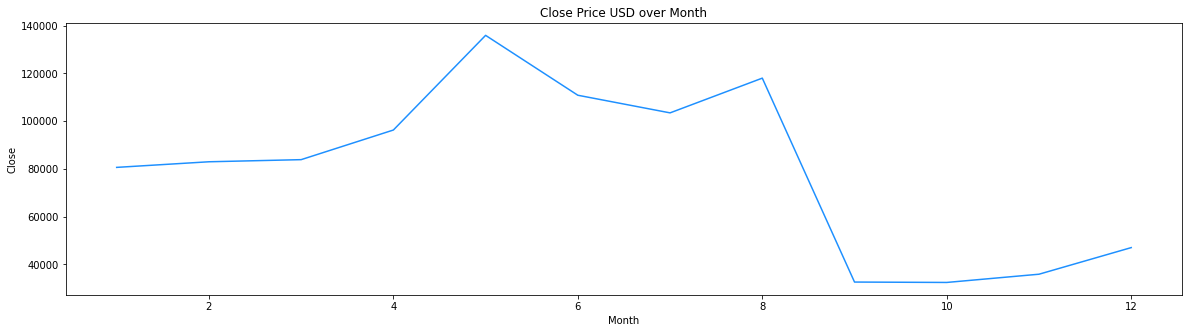

In [34]:
tmp_df_eth = df_eth.groupby(["Month"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Month", y="Close", color="dodgerblue")
plt.title('Close Price USD over Month')
plt.show()

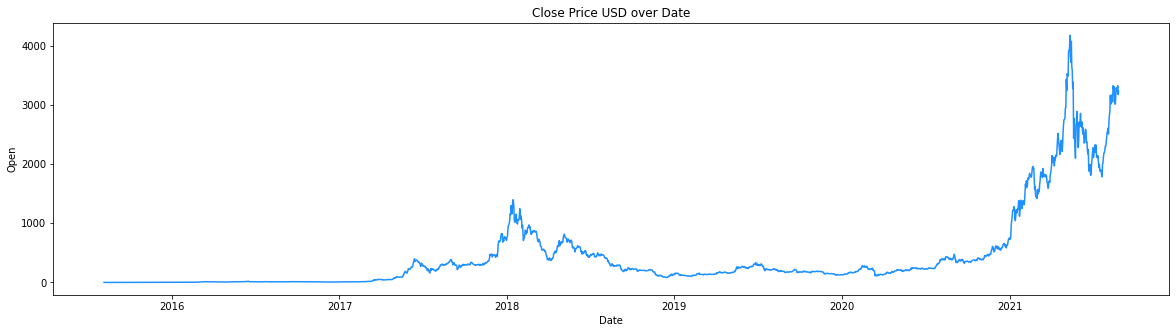

In [35]:
tmp_df_eth = df_eth.groupby(["Date"])["Open"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Date", y="Open", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

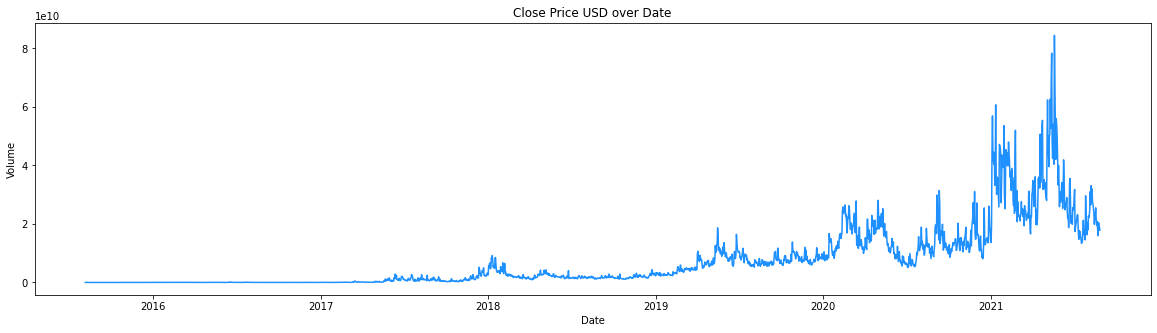

In [36]:
tmp_df_eth = df_eth.groupby(["Date"])["Volume"].sum().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Date", y="Volume", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


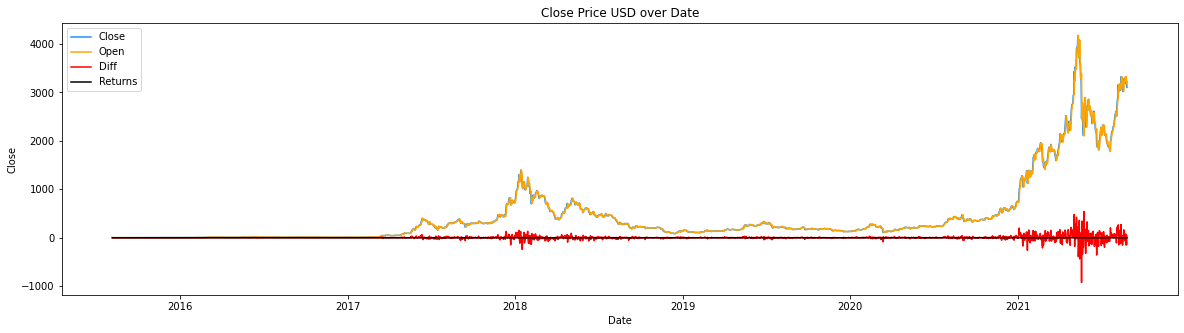

In [39]:
tmp_df_eth = df_eth.groupby(["Date"])["Open","Close", "Volume", "Returns"].sum().reset_index()
tmp_df_eth["Volume"] = np.log(tmp_df_eth["Volume"])
tmp_df_eth["Diff"] = tmp_df_eth["Close"] - tmp_df_eth["Open"] 

plt.figure(figsize=(20,5))
sns.lineplot(data=tmp_df_eth, x="Date", y="Close", color="dodgerblue", label="Close")
sns.lineplot(data=tmp_df_eth, x="Date", y="Open", color="orange", label="Open")
sns.lineplot(data=tmp_df_eth, x="Date", y="Diff", color="red", label="Diff")
sns.lineplot(data=tmp_df_eth, x="Date", y="Returns", color='black', label="Returns")
plt.title('Close Price USD over Date')
plt.legend()
plt.show();

#LSTM

In [ ]:
dataset_df_eth = df_eth[["Date", "Close", "Volume", "Year", "Month", "Day"]]


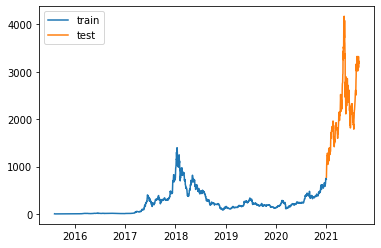

In [ ]:
train_df_eth = dataset_df_eth[dataset_df_eth['Date'] <= '2021'][['Close', 'Date']].set_index('Date')
test_df_eth = dataset_df_eth[dataset_df_eth['Date'] > '2021'][['Close', 'Date']].set_index('Date')
plt.plot(train_df_eth)
plt.plot(test_df_eth)
plt.legend(['train', 'test'])

In [ ]:
dataset_df_eth.drop(["Date"], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
TEST_PERCENT = len(test_df_eth)/len(dataset_df_eth)
TEST_PERCENT


0.10733695652173914

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset_df_eth)

In [ ]:
train_len = int(len(dataset) * (1-TEST_PERCENT))
test_len = len(dataset) - train_len

In [ ]:
train = dataset[0:train_len]
train

array([[5.60734561e-04, 7.36256281e-07, 0.00000000e+00, 6.36363636e-01,
        2.00000000e-01],
       [7.64097046e-05, 6.77131828e-06, 0.00000000e+00, 6.36363636e-01,
        2.33333333e-01],
       [6.40717214e-05, 5.09028993e-06, 0.00000000e+00, 6.36363636e-01,
        2.66666667e-01],
       ...,
       [1.80215002e-01, 2.04709952e-01, 8.33333333e-01, 1.00000000e+00,
        9.66666667e-01],
       [1.76900542e-01, 1.64847081e-01, 8.33333333e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.75116623e-01, 1.61593845e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [ ]:
test = dataset[len(train):]
test

array([[0.18571274, 0.23366492, 1.        , 0.        , 0.03333333],
       [0.23392768, 0.53502435, 1.        , 0.        , 0.06666667],
       [0.2494558 , 0.6740529 , 1.        , 0.        , 0.1       ],
       ...,
       [0.76099299, 0.23828429, 1.        , 0.63636364, 0.76666667],
       [0.77357831, 0.22374523, 1.        , 0.63636364, 0.8       ],
       [0.7439945 , 0.21116432, 1.        , 0.63636364, 0.83333333]])

In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    data_x, data_y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
  
        if out_end_ix > len(sequence):
            break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        data_x.append(seq_x[:,1:])
        data_y.append(seq_y[:,0])
    return np.array(data_x), np.array(data_y)

In [ ]:
n_steps_in, n_steps_out = 180, 1
n_features = 4

X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

In [ ]:
!pip install livelossplot


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from livelossplot import PlotLossesKerasTF

In [ ]:
model_wieght_file = "best_model.hdf_eth5"

lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0, min_delta=0.001, patience=1, verbose=1)

checkpoint = ModelCheckpoint(model_wieght_file, monitor="val_loss", verbose=1, save_best_only=True, mode="min")

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

callbacks = [PlotLossesKerasTF(), es, checkpoint]


In [ ]:
model = Sequential()

model.add(LSTM(256 , input_shape = (n_steps_in , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 180, 256)          267264    
                                                                 
 dropout (Dropout)           (None, 180, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 809,089
Trainable params: 809,089
Non-trai

In [ ]:
model.compile(loss="mean_squared_error", 
              optimizer=Adam(lr=0.0005), 
              metrics=["mean_squared_error"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#Tuning of parameters

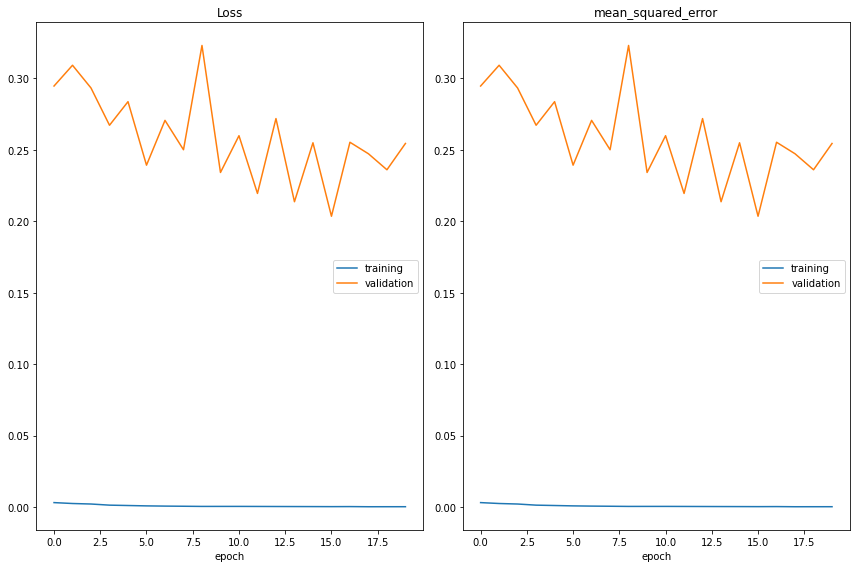

Loss
	training         	 (min:    0.000, max:    0.003, cur:    0.000)
	validation       	 (min:    0.204, max:    0.323, cur:    0.255)
mean_squared_error
	training         	 (min:    0.000, max:    0.003, cur:    0.000)
	validation       	 (min:    0.204, max:    0.323, cur:    0.255)

Epoch 00020: val_loss did not improve from 0.20358
112/112 [==============================] - 106s 945ms/step - loss: 2.6685e-04 - mean_squared_error: 2.6685e-04 - val_loss: 0.2545 - val_mean_squared_error: 0.2545


In [ ]:
EPOCHS = 20
BATCH_SIZE = 16

history = model.fit(X_train, 
                    y_train, 
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = callbacks, 
                    validation_data = (X_test,y_test))

In [ ]:
import math

def model_score(model, X_train, y_train, X_test, y_test):
    train_score = model.evaluate(X_train, y_train, verbose=1)
    print("Train score: %0.5f MSE(%.2f RMSE)" % (train_score[0], math.sqrt(train_score[0])))
    
    test_score = model.evaluate(X_test, y_test, verbose=1)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (test_score[0], math.sqrt(test_score[0])))

In [ ]:
model_score(model, X_train, y_train, X_test, y_test)


56/56 [==============================] - 28s 497ms/step - loss: 2.3819e-04 - mean_squared_error: 2.3819e-04
Train score: 0.00024 MSE(0.02 RMSE)
2/2 [==============================] - 1s 449ms/step - loss: 0.2545 - mean_squared_error: 0.2545
Test Score: 0.25452 MSE (0.50 RMSE)


In [ ]:
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

In [ ]:
pred = model.predict(X_test)
pred = invTransform(scaler, pred)
pred[:10]

array([322.0931082 , 324.9732731 , 329.77300963, 333.22103356,
       336.58986469, 340.34279648, 344.68644453, 349.88279728,
       355.90263105, 362.56877133])

In [ ]:
pred_df_eth = test_df_eth.copy()
pred_df_eth[:-n_steps_in]["Close"] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Red - Predicted Ethurem Series  ,  Blue - Ethurem Series


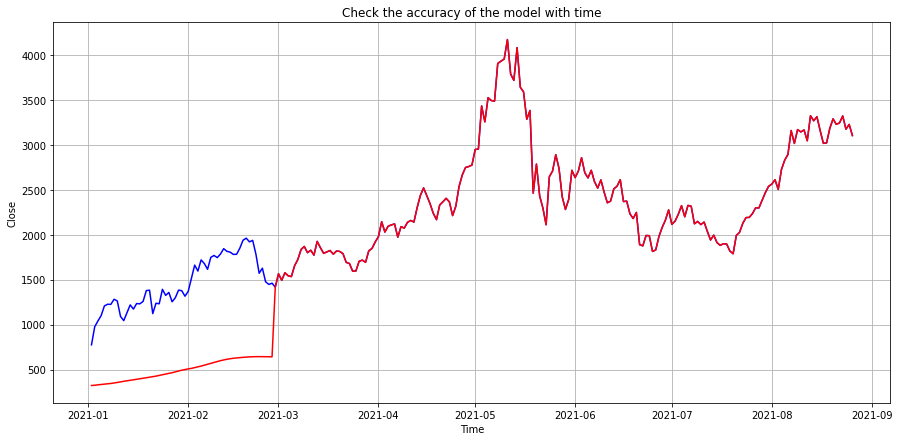

In [ ]:
print("Red - Predicted Ethurem Series  ,  Blue - Ethurem Series")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(test_df_eth["Close"], 'b')
plt.plot(pred_df_eth["Close"] , 'r')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()